In [6]:
import pandas as pd
import numpy as np
import sqlite3

# Generate sample dataset
np.random.seed(42)
vendors = [f"Vendor_{i}" for i in range(1, 31)]
data = {
    "Vendor_ID": range(1, 31),
    "Vendor_Name": vendors,
    "Delivery_Time_Days": np.random.randint(3, 15, size=30),
    "Quality_Score": np.random.uniform(6.0, 10.0, size=30).round(2),
    "Cost_Variance": np.random.uniform(-5, 10, size=30).round(2),
    "On_Time_Delivery": np.random.uniform(70, 100, size=30).round(2),
    "Total_Purchase_Value": np.random.randint(50000, 500000, size=30)
}

df = pd.DataFrame(data)

# ✅ Rename columns to remove special characters for SQL compatibility
df.columns = df.columns.str.replace('%', '', regex=False)

# Save dataset
df.to_csv("vendor_performance.csv", index=False)
print("✅ Sample dataset created successfully!")
df.head()


✅ Sample dataset created successfully!


,Vendor_ID,Vendor_Name,Delivery_Time_Days,Quality_Score,Cost_Variance,On_Time_Delivery,Total_Purchase_Value
0,1,Vendor_1,9,6.03,-1.88,97.79,300396
1,2,Vendor_2,6,6.09,3.52,89.53,214899
2,3,Vendor_3,13,8.10,-4.53,97.45,499036
3,4,Vendor_4,10,7.60,7.63,95.50,374767
4,5,Vendor_5,7,6.19,1.75,83.48,387594


In [4]:
# Create a SQLite database in memory
conn = sqlite3.connect(':memory:')
df.to_sql('vendors', conn, index=False, if_exists='replace')

# Show first few rows using SQL
query = "SELECT * FROM vendors LIMIT 5;"
print(pd.read_sql(query, conn))


   Vendor_ID Vendor_Name  Delivery_Time_Days  Quality_Score  Cost_Variance_%  \
0          1    Vendor_1                   9           6.03            -1.88   
1          2    Vendor_2                   6           6.09             3.52   
2          3    Vendor_3                  13           8.10            -4.53   
3          4    Vendor_4                  10           7.60             7.63   
4          5    Vendor_5                   7           6.19             1.75   

   On_Time_Delivery_%  Total_Purchase_Value  
0               97.79                300396  
1               89.53                214899  
2               97.45                499036  
3               95.50                374767  
4               83.48                387594  


In [7]:
# Average delivery time by vendor
query1 = """
SELECT Vendor_Name,
       AVG(Delivery_Time_Days) AS Avg_Delivery,
       AVG(Quality_Score) AS Avg_Quality,
       AVG("On_Time_Delivery_%") AS OnTime_Performance
FROM vendors
GROUP BY Vendor_Name
ORDER BY OnTime_Performance DESC;
"""
sql_result = pd.read_sql(query1, conn)
print("📊 SQL Result:")
print(sql_result.head())

# Identify underperforming vendors using SQL condition
query2 = """
SELECT Vendor_Name, "On_Time_Delivery_%", Quality_Score
FROM vendors
WHERE "On_Time_Delivery_%" < 80 OR Quality_Score < 7;
"""
underperformers = pd.read_sql(query2, conn)
print("\n⚠️ Underperforming Vendors:")
print(underperformers)

📊 SQL Result:
  Vendor_Name  Avg_Delivery  Avg_Quality  OnTime_Performance
0   Vendor_14           6.0         8.72               99.15
1    Vendor_1           9.0         6.03               97.79
2    Vendor_3          13.0         8.10               97.45
3   Vendor_24           4.0         8.44               96.87
4    Vendor_4          10.0         7.60               95.50

⚠️ Underperforming Vendors:
   Vendor_Name  On_Time_Delivery_%  Quality_Score
0     Vendor_1               97.79           6.03
1     Vendor_2               89.53           6.09
2     Vendor_5               83.48           6.19
3     Vendor_6               72.86           9.90
4     Vendor_7               81.12           6.93
5     Vendor_8               90.07           6.36
6    Vendor_11               78.24           9.93
7    Vendor_16               91.65           6.05
8    Vendor_17               77.08           9.77
9    Vendor_18               77.68           8.25
10   Vendor_19               71.21       

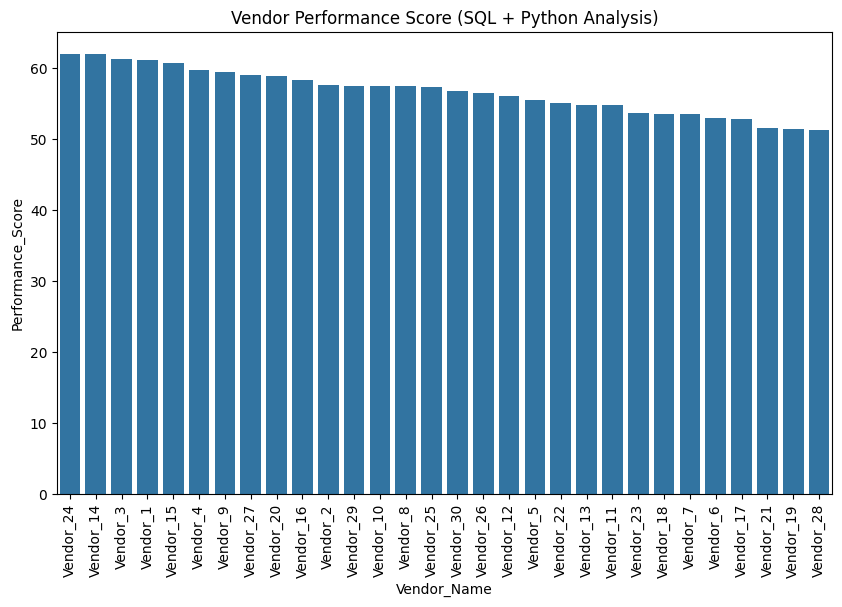

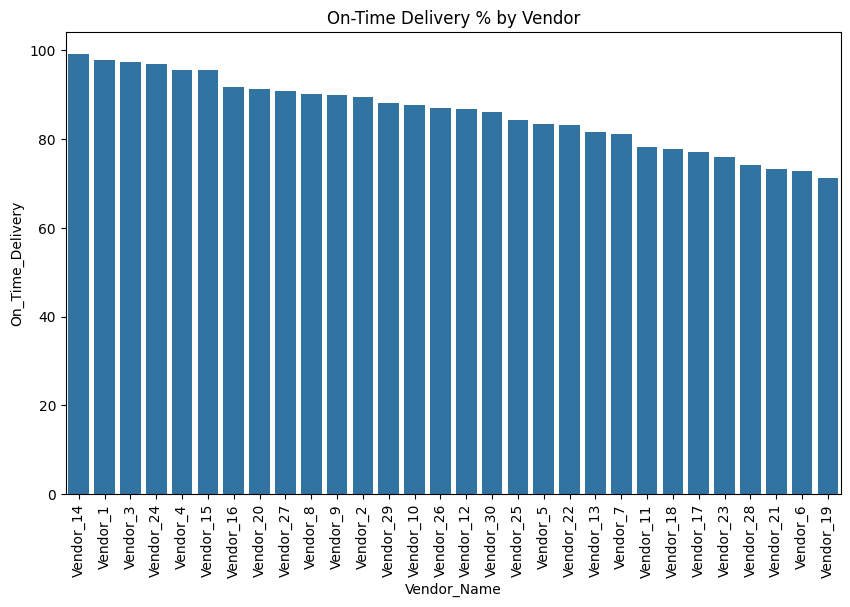

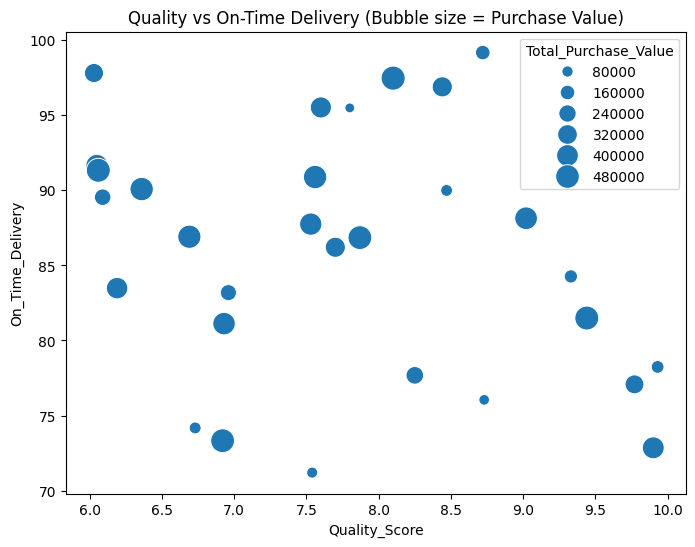

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute performance score (weighted KPI)
df["Performance_Score"] = (
    (df["On_Time_Delivery"] * 0.4)
    + (df["Quality_Score"] * 0.4)
    + ((100 - abs(df["Cost_Variance"])) * 0.2)
)

# --- Vendor performance visualization ---
plt.figure(figsize=(10,6))
sns.barplot(x="Vendor_Name", y="Performance_Score", data=df.sort_values("Performance_Score", ascending=False))
plt.xticks(rotation=90)
plt.title("Vendor Performance Score (SQL + Python Analysis)")
plt.show()

# --- On-time delivery ---
plt.figure(figsize=(10,6))
sns.barplot(x="Vendor_Name", y="On_Time_Delivery", data=df.sort_values("On_Time_Delivery", ascending=False))
plt.xticks(rotation=90)
plt.title("On-Time Delivery % by Vendor")
plt.show()

# --- Quality vs Delivery ---
plt.figure(figsize=(8,6))
sns.scatterplot(x="Quality_Score", y="On_Time_Delivery", size="Total_Purchase_Value", data=df, sizes=(50,300))
plt.title("Quality vs On-Time Delivery (Bubble size = Purchase Value)")
plt.show()


In [9]:
print("\n📈 Key Insights:")
print(f"Average Performance Score: {df['Performance_Score'].mean():.2f}")
print(f"Top Vendor: {df.loc[df['Performance_Score'].idxmax(), 'Vendor_Name']}")
print(f"Worst Vendor: {df.loc[df['Performance_Score'].idxmin(), 'Vendor_Name']}")
print("\nRecommendation: Focus on vendors with low delivery or quality scores for improvement plans.")

# Save results
df.to_csv("vendor_performance_analysis_results.csv", index=False)
print("\n✅ Analysis complete. Results saved as 'vendor_performance_analysis_results.csv'.")



📈 Key Insights:
Average Performance Score: 56.64
Top Vendor: Vendor_24
Worst Vendor: Vendor_28

Recommendation: Focus on vendors with low delivery or quality scores for improvement plans.

✅ Analysis complete. Results saved as 'vendor_performance_analysis_results.csv'.


🧾 Project Summary

Project Title: Vendor Performance Analytics using SQL and Python
Objective: Analyze supplier efficiency, quality, and delivery performance to identify underperforming vendors.
Tech Stack:

SQL (SQLite): For data querying and KPI computation

Python (Pandas, NumPy): For data cleaning and analysis

Matplotlib & Seaborn: For visualization and performance insights

Key Outcomes:

Identified top-performing and underperforming vendors

Built a weighted performance score using KPIs (delivery, quality, cost variance)

Delivered visual insights that support procurement decisions